# Getting Started

The Descartes Labs platform offers the ability to search terrabytes of satellite imagery, perform analysis in a python development environment, and offers the compute capacity to scale analytics to large regions. This quickstart tutorial demonstrates the basic functionality of our core APIs. if searching for imagery over a geometry that is free of clouds using the ```Places``` and ```Metadata``` APIs. We then use the ```Raster``` API to access the data as a ```numpy.array``` and plot the data using ```Matplotlib```.

First, we import a few standard libraries that make life easier:

In [3]:
# import os
import warnings
from pprint import pprint

Next, we import the Descartes Labs platform. If you haven't yet, visit the documentation to learn how to install and authenticate our library. 

In [1]:
import descarteslabs as dl

In [4]:
# Find potential matches
matches = dl.places.find('new-mexico_taos')
pprint(matches)
# The first one looks good to me, so lets make that our area of interest.
aoi = matches[0]

[
  {
    u'bbox': [-106.058364, 36.013014, -105.200117, 36.995841],
    u'id': 102081181,
    u'name': u'Taos',
    u'path': u'continent:north-america_country:united-st...n:new-mexico_district:northwest_county:taos',
    u'placetype': u'county',
    u'slug': u'north-america_united-states_new-mexico_northwest_taos'
  }
]


In [5]:
# This area of interest just gives us some basic properties such as bounding boxes.
# To access a GeoJSON Geometry object of that place, we call the `Places.shape` method, in this case
# accessing a low-resolution version of this particular shape.
shape = dl.places.shape(aoi['slug'], geom='low')

In [6]:
# What imagery is available?
sources = dl.metadata.sources()
pprint(sources)

[
  {
    u'product': u'modis:09:CREFL',
    u'sat_id': u'Terra'
  },
  {
    u'product': u'modis:09:CREFL',
    u'sat_id': u'Aqua'
  },
  {
    u'product': u'sentinel-2:L1C',
    u'sat_id': u'S2A'
  },
  {
    u'product': u'sentinel-2:L1C',
    u'sat_id': u'S2B'
  },
  {
    u'product': u'landsat:LE07:PRE:TOAR',
    u'sat_id': u'LANDSAT_7'
  },
  {
    u'product': u'landsat:LE07:PRE:TOAR',
    u'sat_id': u'Landsat7'
  },
  {
    u'product': u'landsat:LT05:PRE:TOAR',
    u'sat_id': u'LANDSAT_5'
  },
  {
    u'product': u'landsat:LT05:PRE:TOAR',
    u'sat_id': u'Landsat5'
  },
  {
    u'product': u'sentinel-3:OLCI_RGB',
    u'sat_id': u'S3A'
  },
  {
    u'product': u'landsat:LC08:PRE:TOAR',
    u'sat_id': u'LANDSAT_8'
  },
  {
    u'product': u'sentinel-1:GRD',
    u'sat_id': u'SENTINEL-1A'
  },
  {
    u'product': u'sentinel-1:GRD',
    u'sat_id': u'SENTINEL-1B'
  },
  {
    u'product': u'5151d2825f5e29ff129f86d834946363ff3f7e57:modis:09:CREFL_v2_test',
    u'sat_id': u'Aqua'
  },
  {

In [7]:
import json
feature_collection = dl.metadata.search(products='landsat:LC08:PRE:TOAR', start_time='2017-03-12',
                                        end_time='2017-03-20', limit=10, place=aoi['slug'])
# As the variable name implies, this returns a FeatureCollection GeoJSON dictionary.
# Its 'features' are the available scenes.
print len(feature_collection['features'])
# The 'id' associated with each feature is a unique identifier into our imagery database.
# In this case there are two L8 scenes from adjoining WRS rows.
print [f['id'] for f in feature_collection['features']]

2
[u'landsat:LC08:PRE:TOAR:meta_LC80330342017072_v1', u'landsat:LC08:PRE:TOAR:meta_LC80330352017072_v1']


In [9]:
# Lets look at the first feature. The features are a FeatureCollection,
# so if we print it out we get a bunch of information. For example, we see that
# the overall cloud fraction is 1.2%.:
f0 = feature_collection['features'][0]
pprint(f0)

{
  u'geometry': {
    u'coordinates': [
      [
        [-105.8898318, 38.5103536],
        [-103.8445201, 38.1129959],
        [-104.3838427, 36.4246539],
        [-106.377808, 36.8201224],
        ...
      ]
    ],
    u'type': u'Polygon'
  },
  u'id': u'landsat:LC08:PRE:TOAR:meta_LC80330342017072_v1',
  u'key': u'meta_LC80330342017072_v1',
  u'properties': {
    u'acquired': u'2017-03-13T17:37:50.132812Z',
    u'area': 35462.0,
    u'bits_per_pixel': [1.463, 1.778, 0.922],
    u'bright_fraction': 0.1168,
    u'bucket': u'gs://descartes-l8/',
    u'cloud_fraction': 0.1907,
    u'cloud_fraction_0': 0.0643,
    u'cs_code': u'EPSG:32613',
    u'descartes_version': u'hedj-landsat-0.9.7.4',
    u'file_md5s': [u'e084f11d78cedb76968959231e598112', u'd8970e1688a8a97e09f9f4eace81edf6'],
    u'file_sizes': [86541838, 46913535],
    u'files': [u'2017-03-13_033034_L8_432.jp2', u'2017-03-13_033034_L8_567_19a.jp2'],
    u'fill_fraction': 0.6487,
    u'geolocation_accuracy': 4.245,
    u'geotrans

In [15]:
band_information = dl.metadata.bands("landsat:LC08:PRE:TOAR")
# or
#band_information = dl.raster.get_bands_by_key(feature_collection['features'][0]['id'])
pprint(band_information)

[
  {
    u'color': u'Gray',
    u'data_description': u'TOAR, 0-10000 is 0 - 100% reflective',
    u'data_range': [0, 10000],
    u'data_unit': u'TOAR',
    u'data_unit_description': u'Top of atmosphere reflectance',
    u'default_range': [0, 10000],
    u'description': u'Coastal Aerosol',
    u'dtype': u'UInt16',
    u'id': u'landsat:LC08:PRE:TOAR:coastal-aerosol',
    u'jpx_layer': 3,
    u'name': u'coastal-aerosol',
    u'name_common': u'coastal-aerosol',
    u'name_vendor': u'B1',
    u'nbits': 14,
    u'nodata': None,
    u'owner_type': u'core',
    u'physical_range': [0.0, 1.0],
    u'processing_level': u'TOAR',
    u'product': u'landsat:LC08:PRE:TOAR',
    u'res_factor': 2,
    u'resolution': 30,
    u'resolution_unit': u'm',
    u'srcband': 1,
    u'srcfile': 1,
    u'tags': [
      u'spectral',
      u'aerosol',
      u'coastal',
      u'30m',
      ...
    ],
    u'type': u'spectral',
    u'vendor_order': 1,
    u'wavelength_center': 443,
    u'wavelength_fwhm': 16,
    u'wav

In [20]:
# Collect the id's for each feature
ids = [f['id'] for f in feature_collection['features']]
# Rasterize the features.
#  * Select red, green, blue, alpha
#  * Scale the incoming data with range [0, 10000] down to [0, 4000] (40% TOAR)
#  * Choose an output type of "Byte" (uint8)
#  * Choose 60m resolution
#  * Apply a cutline of Taos county
arr, meta = dl.raster.ndarray(
    ids,
    bands=['red', 'green', 'blue', 'alpha'],
    scales=[[0,4000], [0, 4000], [0, 4000], None],
    data_type='Byte',
    resolution=60,
    cutline=shape['geometry'],
)

# Note: A value of 1 in the alpha channel signifies where there is valid data.
# We use this throughout the majority of our imagery as a standard way of specifying
# valid or nodata regions. This is particularly helpful if a value of 0 in a particular
# band has meaning, rather than specifying a lack of data.

In [21]:
# We'll use matplotlib to make a quick plot of the image.
import matplotlib.pyplot as plt
%matplotlib inline

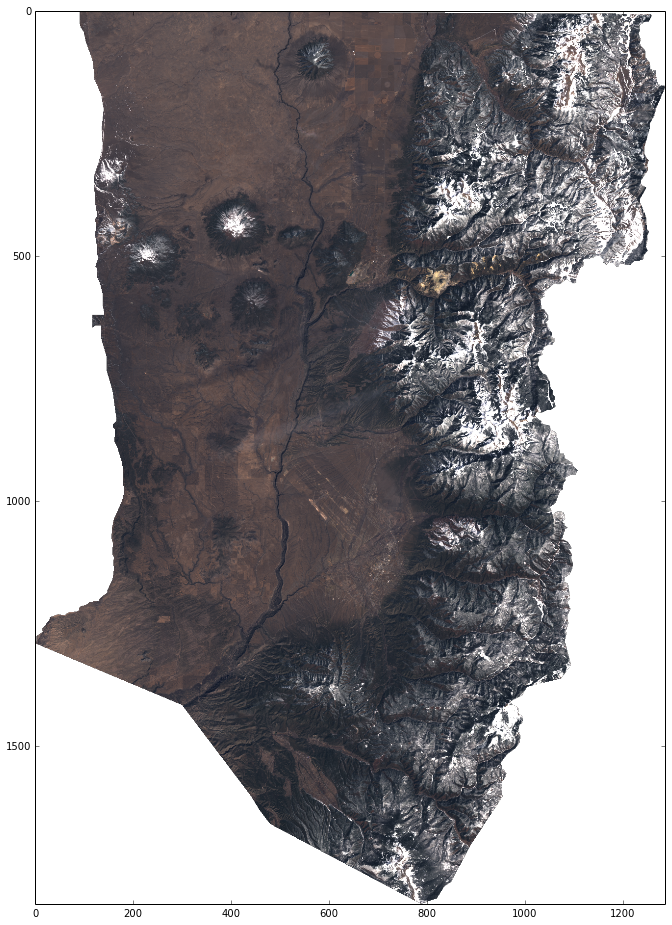

In [22]:
plt.figure(figsize=[16,16])
plt.imshow(arr)

In [19]:
# Collect the id's for each feature
ids = [f['id'] for f in feature_collection['features']]
# Rasterize the features.
#  * Select red, green, blue, alpha
#  * Scale the incoming data with range [0, 10000] down to [0, 4000] (40% TOAR)
#  * Choose an output type of "Byte" (uint8)
#  * Choose 60m resolution
#  * Apply a cutline of Taos county
arr, meta = dl.raster.raster(
    ids,
    bands=['red', 'green', 'blue', 'alpha'],
    scales=[[0,4000], [0, 4000], [0, 4000], None],
    output_format='GTiff',
    data_type='Byte',
    resolution=60,
    cutline=shape['geometry'],
    save=True,
    outfile_basename="taos"
)

# Note: A value of 1 in the alpha channel signifies where there is valid data.
# We use this throughout the majority of our imagery as a standard way of specifying
# valid or nodata regions. This is particularly helpful if a value of 0 in a particular
# band has meaning, rather than specifying a lack of data.

In [23]:
from descarteslabs.client.services import Catalog

In [26]:
Catalog().add_product('taos_example', 'Taos Example', 'Demo for platform users' )

{u'data': {u'attributes': {u'description': u'Demo for platform users',
   u'read': [],
   u'title': u'Taos Example'},
  u'id': u'7294028cc01114d89a473cf055d29dc5cd5ffe88:taos_example',
  u'meta': {u'owner': {u'email': None,
    u'name': u'Karla King',
    u'uuid': u'google-oauth2|101598335967461239621'},
   u'owner_type': u'user'},
  u'type': u'product'}}

In [31]:
# add band ids for each band
# bands=['red', 'green', 'blue', 'nir', 'red-edge', 'red-edge-2', 'red-edge-3', 'red-edge-4', 'swir1', 'swir2', 'ndvi', 'ndwi1', 'ndwi2']
bands=['red', 'green', 'blue']

for i, band in enumerate(bands):
       
        band_id = Catalog().add_band(
            '7294028cc01114d89a473cf055d29dc5cd5ffe88:taos_example', # id of the product we just created.
            '{}'.format(band),
            jpx_layer=0,
            srcfile=0,
            srcband=i+1,  # src band is always a 1-based index (counting starts at 1)
            nbits=16,
            dtype='UInt16',
            nodata=0,
            data_range=[0, 255],
            type='spectral',
             default_range=(0,4000),
        )['data']['id']

In [27]:
# catalog.upload_image(image, product_id, acquired=acquired_date)
acquired_date = '2018-01-09'
Catalog().upload_image('/Users/karlaking/descarteslabs-code/test-tutorials/taos.tif', '7294028cc01114d89a473cf055d29dc5cd5ffe88:taos_example', acquired=acquired_date)

u'/Users/karlaking/descarteslabs-code/test-tutorials'